In [3]:
import torch as tr
import numpy as np

In [4]:
tr.__version__

'1.5.0'

In [10]:
x = [1,2,3]
ar = np.array(x)
print(ar)
print(ar.shape)

[1 2 3]
(3,)


In [11]:
tensor = tr.tensor(x)
print(tensor)
print(tensor.shape)

tensor([1, 2, 3])
torch.Size([3])


In [14]:
print(ar.mean())
print(tensor.float().mean())

2.0
tensor(2.)


In [16]:
tensor = tr.randn((2,2))
tensor

tensor([[-0.4550,  0.2210],
        [ 0.8113,  0.3034]])

In [17]:
# Matrix Multiplication
tensor@tensor

tensor([[ 0.3863, -0.0335],
        [-0.1230,  0.2714]])

In [18]:
tensor.T

tensor([[-0.4550,  0.8113],
        [ 0.2210,  0.3034]])

In [20]:
tensor = tr.tensor([1,1,23])
tensor.view((3,1))

tensor([[ 1],
        [ 1],
        [23]])

# Linear Regression using PyTorch

In [97]:
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn')

In [98]:
X = pd.read_csv("../Linear Regression/Linear_X_Train.csv").values
y = pd.read_csv("../Linear Regression/Linear_Y_Train.csv").values

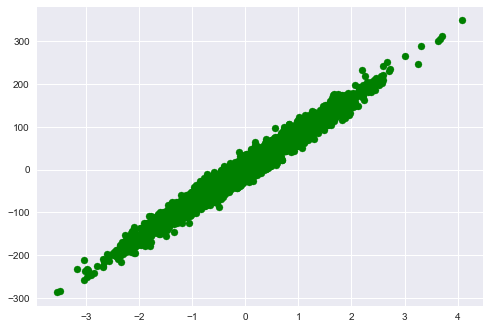

In [99]:
plt.scatter(X,y,color="green")
plt.show()

In [100]:
X_, y_ = tr.tensor(X),tr.tensor(y)

In [101]:
m = tr.nn.Parameter(data = tr.randn(1))
c = tr.nn.Parameter(data = tr.randn(1))

y_pred = m*X_+c

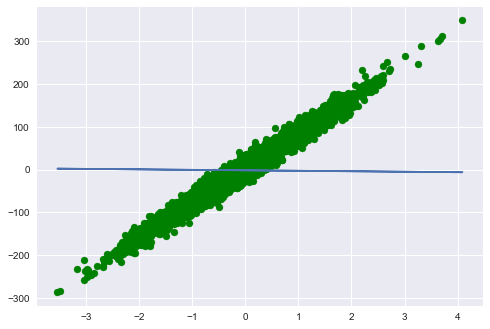

In [102]:
plt.scatter(X,y,color="green")
plt.plot(X,y_pred.detach().numpy())
plt.show()

In [105]:
def mse(y,y_pred):
    return ((y-y_pred)**2).mean()
loss_list=[]
for i in range(50):
    y_pred = m*X_ + c
    lr = 0.1
    loss = mse(y_,y_pred)
    loss_list.append(loss)
    loss.backward()

    with tr.no_grad():
        m -= lr*m.grad
        c -= lr*c.grad

        m.grad.zero_()
        c.grad.zero_()

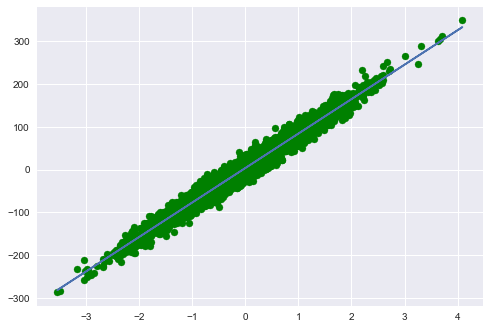

In [107]:
plt.scatter(X,y,color="green")
plt.plot(X_,y_pred.detach().numpy())
plt.show()

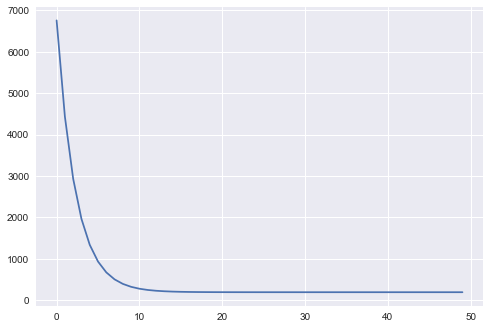

In [108]:
plt.plot(loss_list)
plt.show()